## Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
business = pd.read_csv('yelp_business.csv')

In [85]:
business = business.dropna()

### Dataset Features

In [86]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67741 entries, 6 to 174561
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   67741 non-null  object 
 1   name          67741 non-null  object 
 2   neighborhood  67741 non-null  object 
 3   address       67741 non-null  object 
 4   city          67741 non-null  object 
 5   state         67741 non-null  object 
 6   postal_code   67741 non-null  object 
 7   latitude      67741 non-null  float64
 8   longitude     67741 non-null  float64
 9   stars         67741 non-null  float64
 10  review_count  67741 non-null  int64  
 11  is_open       67741 non-null  int64  
 12  categories    67741 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 7.2+ MB


### Excluding business which are closed

In [87]:
business['is_open'].value_counts()

1    55259
0    12482
Name: is_open, dtype: int64

In [88]:
business = business[business['is_open'] == 1]

### Excluding business which are not food related

In [89]:
business['categories'].value_counts().head(10)

Food;Coffee & Tea            393
Coffee & Tea;Food            370
Beauty & Spas;Hair Salons    313
Hair Salons;Beauty & Spas    287
Restaurants;Pizza            284
Pizza;Restaurants            278
Chinese;Restaurants          254
Restaurants;Chinese          252
Nail Salons;Beauty & Spas    250
Beauty & Spas;Nail Salons    244
Name: categories, dtype: int64

In [90]:
business = business[business['categories'].str.contains(
    'food|restaurant|coffee|bar')]

In [91]:
business['categories'].value_counts().head(10)

Restaurants;Seafood                    29
Seafood;Restaurants                    27
Food;Specialty Food;Seafood Markets    11
Specialty Food;Seafood Markets;Food     8
Seafood Markets;Food;Specialty Food     7
Specialty Food;Food;Seafood Markets     7
Seafood Markets;Specialty Food;Food     6
Fish & Chips;Seafood;Restaurants        5
Italian;Restaurants;Seafood             5
Mexican;Seafood;Restaurants             4
Name: categories, dtype: int64

### Top 10 Cities 

In [92]:
cities = business['city'].value_counts().nlargest(10).index
city_counts = business['city'].value_counts().nlargest(10).values

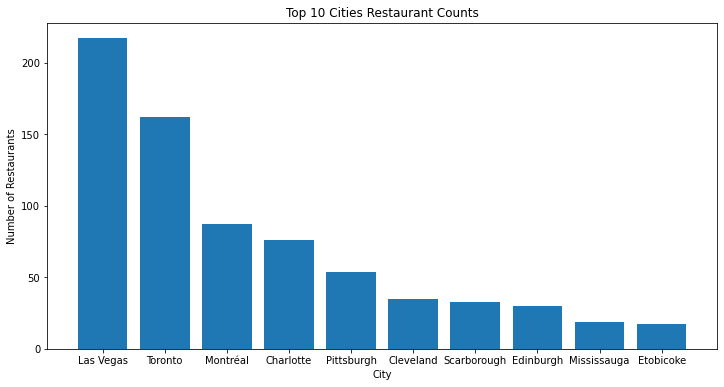

In [94]:
plt.figure(figsize=(12, 6))
plt.bar(cities, city_counts)
plt.title('Top 10 Cities Restaurant Counts')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

### Top 10 States

In [95]:
states = business['state'].value_counts().nlargest(10).index
state_counts = business['state'].value_counts().nlargest(10).values

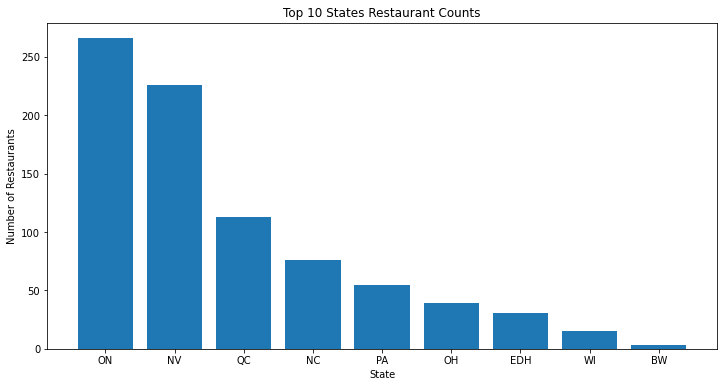

In [96]:
plt.figure(figsize=(12, 6))
plt.bar(states, state_counts)
plt.title('Top 10 States Restaurant Counts')
plt.xlabel('State')
plt.ylabel('Number of Restaurants')
plt.show()

### Star Ratings Distributions

In [97]:
business['stars'].value_counts()

4.0    271
3.5    238
4.5    120
3.0    109
2.5     52
5.0     19
2.0     10
1.5      4
1.0      1
Name: stars, dtype: int64

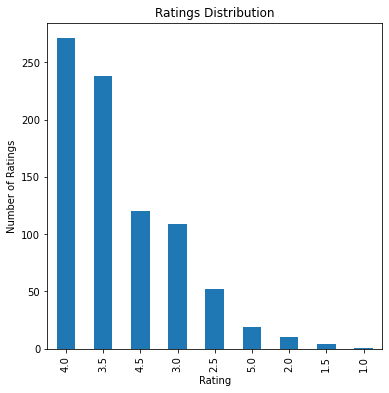

In [98]:
plt.figure(figsize=(6, 6))
business['stars'].value_counts().plot.bar()
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

### Reviews Distribution

In [99]:
business['review_count'].describe()

count     824.000000
mean      145.623786
std       269.756565
min         3.000000
25%        14.000000
50%        51.000000
75%       171.000000
max      3964.000000
Name: review_count, dtype: float64

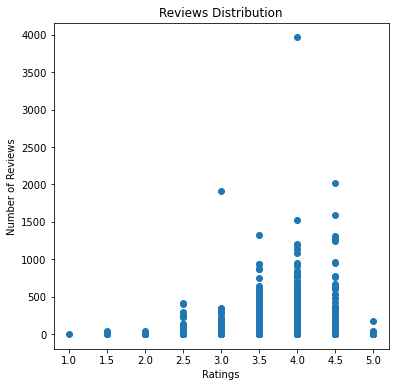

In [100]:
plt.figure(figsize=(6, 6))
plt.scatter(x='stars', y='review_count', data=business)
plt.title('Reviews Distribution')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.show()

### Combining Reviews with Business

In [101]:
reviews = pd.read_csv('yelp_review.csv')

In [102]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [103]:
reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [104]:
restaurant_reviews = pd.merge(business, reviews, on='business_id')

In [105]:
restaurant_reviews

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
0,xMP2oDrKFqyUrN0Uww85EQ,"""Dockside Seafood Market""",Eastland,"""3017 Kilborne Dr""",Charlotte,NC,28205,35.214618,-80.770211,4.5,...,1,Seafood Markets;Food;Specialty Food,gIGNJQQyQnJ-P-OJWu-a7w,yCaDISH0R8e5U376zDWTpQ,5,2014-01-21,I have been coming to this seafood spot off an...,2,0,0
1,xMP2oDrKFqyUrN0Uww85EQ,"""Dockside Seafood Market""",Eastland,"""3017 Kilborne Dr""",Charlotte,NC,28205,35.214618,-80.770211,4.5,...,1,Seafood Markets;Food;Specialty Food,nuPTQPA0lPY2jLl2NZLrrg,ulHMcirOj_xRV9GkGV2HRA,5,2014-11-10,I absolutely love this place. This is where oi...,0,0,0
2,xMP2oDrKFqyUrN0Uww85EQ,"""Dockside Seafood Market""",Eastland,"""3017 Kilborne Dr""",Charlotte,NC,28205,35.214618,-80.770211,4.5,...,1,Seafood Markets;Food;Specialty Food,WmL_v5CfVMc2crl22gMHWg,9IRuYmy5YmhtNQ6ei1p-uQ,4,2010-11-22,Dockside has been a fresh seafood staple on th...,5,1,2
3,dPxZI9lrKTl5dvFfnb1_Ig,"""Trattoria Italia""",Anthem,"""9905 S Eastern Ave, Ste 140""",Las Vegas,NV,89183,36.010086,-115.118656,4.5,...,1,Seafood;Italian;Pizza;Restaurants,g8yoM5RkDL2HTpk07jkYCg,oFyOUOeGTRZhFPF9uTqrTQ,5,2016-12-13,Went in for the first time tonight and within ...,0,0,1
4,dPxZI9lrKTl5dvFfnb1_Ig,"""Trattoria Italia""",Anthem,"""9905 S Eastern Ave, Ste 140""",Las Vegas,NV,89183,36.010086,-115.118656,4.5,...,1,Seafood;Italian;Pizza;Restaurants,2-lACtC5w76LRGXlE3c-UQ,RSLTG7N0wYJhRTW5CGEm5Q,5,2017-09-22,Hands down this is Las Vegas best mom and pop ...,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119993,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Newington,"""233-235 Causewayside""",Edinburgh,EDH,EH9 1PH,55.934965,-3.179002,4.5,...,1,Seafood;Italian;Restaurants,xE6BhU7eUsOl9hfV4bevFQ,NeYPCyHw0Tp67N1ebDCnjw,4,2012-09-14,The restaurant has recently moved their cuisin...,2,0,0
119994,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Newington,"""233-235 Causewayside""",Edinburgh,EDH,EH9 1PH,55.934965,-3.179002,4.5,...,1,Seafood;Italian;Restaurants,MdlEC7QVkRGP1IaBz45naw,Cy1PV2TdYeDFA16mUOlr3Q,4,2010-06-11,The contrast of the Old and New Bell is really...,2,0,0
119995,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Newington,"""233-235 Causewayside""",Edinburgh,EDH,EH9 1PH,55.934965,-3.179002,4.5,...,1,Seafood;Italian;Restaurants,aGoSH3BRK-bMm2FhAZRvlg,zF-hK3107dbCR9vW_kRTWg,4,2011-04-07,Been to the New Bell once and thoroughly enjoy...,1,0,0
119996,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Newington,"""233-235 Causewayside""",Edinburgh,EDH,EH9 1PH,55.934965,-3.179002,4.5,...,1,Seafood;Italian;Restaurants,FrNRdjy8r3grsVdfpBOcZw,iCNZXVbsmPomY-SiAXYklw,5,2012-10-13,Went to the New Bell on Tuesday. Fantastic ser...,1,0,1


In [112]:
restaurant_reviews = restaurant_reviews.rename(
    columns={'stars_x': 'avg_stars', 'stars_y': 'review_stars'})

In [113]:
restaurant_reviews

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,avg_stars,...,is_open,categories,review_id,user_id,review_stars,date,text,useful,funny,cool
0,xMP2oDrKFqyUrN0Uww85EQ,"""Dockside Seafood Market""",Eastland,"""3017 Kilborne Dr""",Charlotte,NC,28205,35.214618,-80.770211,4.5,...,1,Seafood Markets;Food;Specialty Food,gIGNJQQyQnJ-P-OJWu-a7w,yCaDISH0R8e5U376zDWTpQ,5,2014-01-21,I have been coming to this seafood spot off an...,2,0,0
1,xMP2oDrKFqyUrN0Uww85EQ,"""Dockside Seafood Market""",Eastland,"""3017 Kilborne Dr""",Charlotte,NC,28205,35.214618,-80.770211,4.5,...,1,Seafood Markets;Food;Specialty Food,nuPTQPA0lPY2jLl2NZLrrg,ulHMcirOj_xRV9GkGV2HRA,5,2014-11-10,I absolutely love this place. This is where oi...,0,0,0
2,xMP2oDrKFqyUrN0Uww85EQ,"""Dockside Seafood Market""",Eastland,"""3017 Kilborne Dr""",Charlotte,NC,28205,35.214618,-80.770211,4.5,...,1,Seafood Markets;Food;Specialty Food,WmL_v5CfVMc2crl22gMHWg,9IRuYmy5YmhtNQ6ei1p-uQ,4,2010-11-22,Dockside has been a fresh seafood staple on th...,5,1,2
3,dPxZI9lrKTl5dvFfnb1_Ig,"""Trattoria Italia""",Anthem,"""9905 S Eastern Ave, Ste 140""",Las Vegas,NV,89183,36.010086,-115.118656,4.5,...,1,Seafood;Italian;Pizza;Restaurants,g8yoM5RkDL2HTpk07jkYCg,oFyOUOeGTRZhFPF9uTqrTQ,5,2016-12-13,Went in for the first time tonight and within ...,0,0,1
4,dPxZI9lrKTl5dvFfnb1_Ig,"""Trattoria Italia""",Anthem,"""9905 S Eastern Ave, Ste 140""",Las Vegas,NV,89183,36.010086,-115.118656,4.5,...,1,Seafood;Italian;Pizza;Restaurants,2-lACtC5w76LRGXlE3c-UQ,RSLTG7N0wYJhRTW5CGEm5Q,5,2017-09-22,Hands down this is Las Vegas best mom and pop ...,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119993,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Newington,"""233-235 Causewayside""",Edinburgh,EDH,EH9 1PH,55.934965,-3.179002,4.5,...,1,Seafood;Italian;Restaurants,xE6BhU7eUsOl9hfV4bevFQ,NeYPCyHw0Tp67N1ebDCnjw,4,2012-09-14,The restaurant has recently moved their cuisin...,2,0,0
119994,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Newington,"""233-235 Causewayside""",Edinburgh,EDH,EH9 1PH,55.934965,-3.179002,4.5,...,1,Seafood;Italian;Restaurants,MdlEC7QVkRGP1IaBz45naw,Cy1PV2TdYeDFA16mUOlr3Q,4,2010-06-11,The contrast of the Old and New Bell is really...,2,0,0
119995,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Newington,"""233-235 Causewayside""",Edinburgh,EDH,EH9 1PH,55.934965,-3.179002,4.5,...,1,Seafood;Italian;Restaurants,aGoSH3BRK-bMm2FhAZRvlg,zF-hK3107dbCR9vW_kRTWg,4,2011-04-07,Been to the New Bell once and thoroughly enjoy...,1,0,0
119996,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Newington,"""233-235 Causewayside""",Edinburgh,EDH,EH9 1PH,55.934965,-3.179002,4.5,...,1,Seafood;Italian;Restaurants,FrNRdjy8r3grsVdfpBOcZw,iCNZXVbsmPomY-SiAXYklw,5,2012-10-13,Went to the New Bell on Tuesday. Fantastic ser...,1,0,1


In [114]:
restaurant_reviews.to_csv(
    'processed_datasets/1_restaurant_reviews_cleaned.csv')

## Text Sentiment Analysis

In [2]:
import regex as re
import string

from wordcloud import WordCloud

from textblob import TextBlob, Word

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [119]:
restaurant_reviews = pd.read_csv(
    'processed_datasets/1_restaurant_reviews_cleaned.csv')

In [120]:
restaurant_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    119998 non-null  int64  
 1   business_id   119998 non-null  object 
 2   name          119998 non-null  object 
 3   neighborhood  119998 non-null  object 
 4   address       119998 non-null  object 
 5   city          119998 non-null  object 
 6   state         119998 non-null  object 
 7   postal_code   119998 non-null  object 
 8   latitude      119998 non-null  float64
 9   longitude     119998 non-null  float64
 10  avg_stars     119998 non-null  float64
 11  review_count  119998 non-null  int64  
 12  is_open       119998 non-null  int64  
 13  categories    119998 non-null  object 
 14  review_id     119998 non-null  object 
 15  user_id       119998 non-null  object 
 16  review_stars  119998 non-null  int64  
 17  date          119998 non-null  object 
 18  text

### Assigning Sentiment Based on Review Stars

In [121]:
restaurant_reviews.loc[restaurant_reviews['review_stars']
                       == 3, 'sentiment'] = 'neutral'
restaurant_reviews.loc[restaurant_reviews['review_stars']
                       < 3, 'sentiment'] = 'negative'
restaurant_reviews.loc[restaurant_reviews['review_stars']
                       > 3, 'sentiment'] = 'positive'

### Remove Special Characters

In [122]:
restaurant_reviews['text'] = restaurant_reviews['text'].str.lower()
restaurant_reviews['text'] = restaurant_reviews['text'].str.replace(
    '\n', ' ').str.replace('\r', '')
restaurant_reviews['text'] = restaurant_reviews['text'].str.replace(
    r'[0-9]', '', regex=True)
restaurant_reviews['text'] = restaurant_reviews['text'].str.replace(
    '['+string.punctuation+']', '', regex=True)

### Calculating Polarity and Subjectivity

In [123]:
polarity = restaurant_reviews['text'].apply(lambda x: TextBlob(x).sentiment)

In [124]:
polarity_df = pd.DataFrame(polarity.to_list())

In [125]:
restaurant_reviews[['polarity', 'subjectivity']
                   ] = polarity_df[['polarity', 'subjectivity']]

In [126]:
restaurant_reviews[['name', 'review_stars', 'text',
                    'sentiment', 'polarity', 'subjectivity']]

,name,review_stars,text,sentiment,polarity,subjectivity
0,"""Dockside Seafood Market""",5,i have been coming to this seafood spot off an...,positive,0.186538,0.596795
1,"""Dockside Seafood Market""",5,i absolutely love this place this is where oil...,positive,0.176667,0.568333
2,"""Dockside Seafood Market""",4,dockside has been a fresh seafood staple on th...,positive,0.187037,0.547222
3,"""Trattoria Italia""",5,went in for the first time tonight and within ...,positive,0.376623,0.536472
4,"""Trattoria Italia""",5,hands down this is las vegas best mom and pop ...,positive,0.089909,0.408390
...,...,...,...,...,...,...
119993,"""The New Bell""",4,the restaurant has recently moved their cuisin...,positive,0.185870,0.388354
119994,"""The New Bell""",4,the contrast of the old and new bell is really...,positive,0.256578,0.482225
119995,"""The New Bell""",4,been to the new bell once and thoroughly enjoy...,positive,0.272727,0.550758
119996,"""The New Bell""",5,went to the new bell on tuesday fantastic serv...,positive,0.325505,0.509091


### Creating a wordcloud based on reviews

In [127]:
reviews_text = ' '.join(review for review in restaurant_reviews['text'])

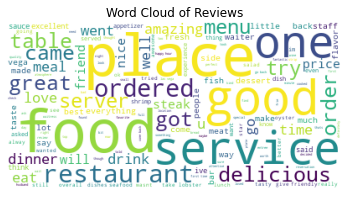

In [128]:
wc = WordCloud(background_color="white", max_font_size=70, max_words=150)
wc.generate(reviews_text)
plt.imshow(wc)
plt.axis("off")
plt.title('Word Cloud of Reviews')
plt.show()

### Tokenizing and Lemmatizing

In [129]:
restaurant_reviews['tokenized_words'] = restaurant_reviews['text'].apply(
    lambda x: nltk.word_tokenize(x))

In [130]:
lemmetizer_output = WordNetLemmatizer()
restaurant_reviews['tokenized_words'] = restaurant_reviews['tokenized_words'].apply(
    lambda x: [lemmetizer_output.lemmatize(j) for j in x if not j in set(stopwords.words('english'))])

In [131]:
restaurant_reviews.to_csv('processed_datasets/2_restaurant_reviews_text_analysis.csv')

In [134]:
restaurant_reviews['tokenized_words']=restaurant_reviews['tokenized_words'].apply(lambda x: ' '.join(x))

In [135]:
restaurant_reviews['tokenized_words']

0         coming seafood spot since moving charlotte inq...
1         absolutely love place oil prefer buy seafood h...
2         dockside fresh seafood staple eastside charlot...
3         went first time tonight within first bite garl...
4         hand la vega best mom pop style italian cuisin...
                                ...                        
119993    restaurant recently moved cuisine italian rath...
119994    contrast old new bell really interesting initi...
119995    new bell thoroughly enjoyed great quality food...
119996    went new bell tuesday fantastic service even b...
119997    new bell finedining restaurant sits old bell i...
Name: tokenized_words, Length: 119998, dtype: object

In [136]:
restaurant_reviews.to_csv('processed_datasets/2_restaurant_reviews_text_analysis.csv')

## Vectorization

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [4]:
restaurant_reviews = pd.read_csv('processed_datasets/2_restaurant_reviews_text_analysis.csv')

In [5]:
threshold = 3.5
restaurant_reviews['target'] = restaurant_reviews['avg_stars'].apply(lambda x: 1 if x >= threshold else 0)

In [58]:
features=['business_id','name','city','state','postal_code','avg_stars','review_count','review_stars','tokenized_words','target']
restaurants=restaurant_reviews.loc[:,features]

In [59]:
restaurants

,business_id,name,city,state,postal_code,avg_stars,review_count,review_stars,tokenized_words,target
0,xMP2oDrKFqyUrN0Uww85EQ,"""Dockside Seafood Market""",Charlotte,NC,28205,4.5,3,5,coming seafood spot since moving charlotte inq...,1
1,xMP2oDrKFqyUrN0Uww85EQ,"""Dockside Seafood Market""",Charlotte,NC,28205,4.5,3,5,absolutely love place oil prefer buy seafood h...,1
2,xMP2oDrKFqyUrN0Uww85EQ,"""Dockside Seafood Market""",Charlotte,NC,28205,4.5,3,4,dockside fresh seafood staple eastside charlot...,1
3,dPxZI9lrKTl5dvFfnb1_Ig,"""Trattoria Italia""",Las Vegas,NV,89183,4.5,210,5,went first time tonight within first bite garl...,1
4,dPxZI9lrKTl5dvFfnb1_Ig,"""Trattoria Italia""",Las Vegas,NV,89183,4.5,210,5,hand la vega best mom pop style italian cuisin...,1
...,...,...,...,...,...,...,...,...,...,...
119993,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Edinburgh,EDH,EH9 1PH,4.5,7,4,restaurant recently moved cuisine italian rath...,1
119994,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Edinburgh,EDH,EH9 1PH,4.5,7,4,contrast old new bell really interesting initi...,1
119995,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Edinburgh,EDH,EH9 1PH,4.5,7,4,new bell thoroughly enjoyed great quality food...,1
119996,Jxbw1bIsLvZ3UAvN59xj8Q,"""The New Bell""",Edinburgh,EDH,EH9 1PH,4.5,7,5,went new bell tuesday fantastic service even b...,1


In [8]:
X=restaurants.drop('target',axis=1)
y=restaurants['target'].values

In [9]:
def vectorize_data(data):
    fitted_vector=CountVectorizer().fit(data)
    transformed_data=fitted_vector.transform(data)
    return transformed_data

In [10]:
X=vectorize_data(X['tokenized_words'])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [12]:
X_train.shape

(95998, 104432)

In [13]:
X_test.shape

(24000, 104432)

## Determining the best Classifier

In [14]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

### Naive Bayes Classifier

In [15]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)
naive_bayes_predict=naive_bayes.predict(X_test)
naive_bayes_cf_matrix=confusion_matrix(y_test,naive_bayes_predict)
naive_bayes_accuracy=round(accuracy_score(y_test,naive_bayes_predict)*100,2)
naive_bayes_precision=round(precision_score(y_test,naive_bayes_predict)*100,2)
naive_bayes_report=classification_report(y_test,naive_bayes_predict)

### Logistic Regression

In [16]:
logistic_regression=LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_regression.fit(X_train,y_train)
logisitc_regression_predict=logistic_regression.predict(X_test)
logisitc_regression_cf_matrix=confusion_matrix(y_test,logisitc_regression_predict)
logisitc_regression_accuracy=round(accuracy_score(y_test,logisitc_regression_predict)*100,2)
logisitc_regression_precision=round(precision_score(y_test,logisitc_regression_predict)*100,2)
logisitc_regression_report=classification_report(y_test,logisitc_regression_predict)

### Decision Trees

In [17]:
descision_tree = DecisionTreeClassifier(random_state=20,max_depth=100)
descision_tree.fit(X_train,y_train)
descision_tree_predict = descision_tree.predict(X_test)
descision_tree_cf_matrix=confusion_matrix(y_test,descision_tree_predict)
descision_tree_accuracy=round(accuracy_score(y_test,descision_tree_predict)*100,2)
descision_tree_precision=round(precision_score(y_test,descision_tree_predict)*100,2)
descision_tree_report=classification_report(y_test,descision_tree_predict)

### Random Forest Classifier

In [18]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
random_forest_predict = random_forest.predict(X_test)
random_forest_cf_matrix=confusion_matrix(y_test,random_forest_predict)
random_forest_accuracy=round(accuracy_score(y_test,random_forest_predict)*100,2)
random_forest_precision=round(precision_score(y_test,random_forest_predict)*100,2)
random_forest_report=classification_report(y_test,random_forest_predict)

### Results

#### Confusion Matrices Heatmaps

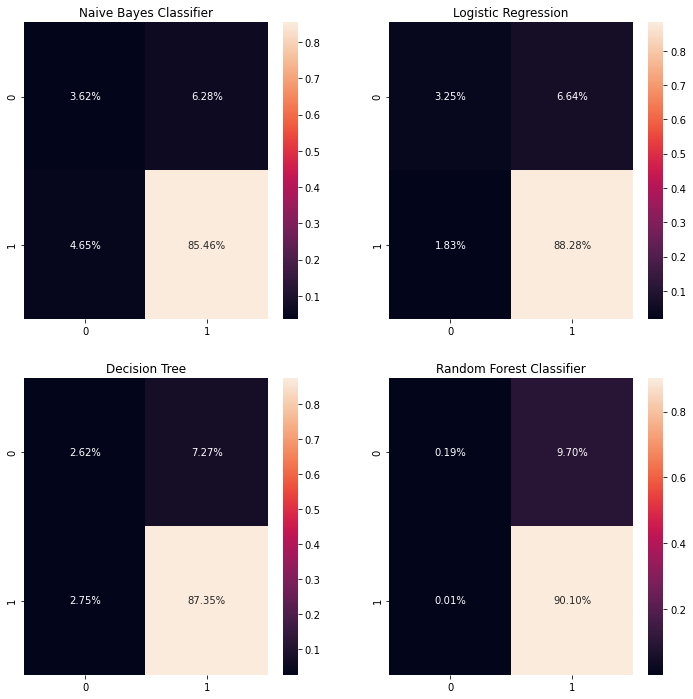

In [20]:
heatmaps = plt.figure(figsize=(12, 12))
ax1 = heatmaps.add_subplot(2, 2, 1)
ax1.set_title('Naive Bayes Classifier')
ax2 = heatmaps.add_subplot(2, 2, 2)
ax2.set_title('Logistic Regression')
ax3 = heatmaps.add_subplot(2, 2, 3)
ax3.set_title('Decision Tree')
ax4 = heatmaps.add_subplot(2, 2, 4)
ax4.set_title('Random Forest Classifier')
sns.heatmap(naive_bayes_cf_matrix/np.sum(naive_bayes_cf_matrix),
            annot=True, fmt='.2%', ax=ax1)
sns.heatmap(logisitc_regression_cf_matrix /
            np.sum(logisitc_regression_cf_matrix), annot=True, fmt='.2%', ax=ax2)
sns.heatmap(descision_tree_cf_matrix /
            np.sum(descision_tree_cf_matrix), annot=True, fmt='.2%', ax=ax3)
sns.heatmap(random_forest_cf_matrix /
            np.sum(random_forest_cf_matrix), annot=True, fmt='.2%')
plt.show()

#### ROC Curves

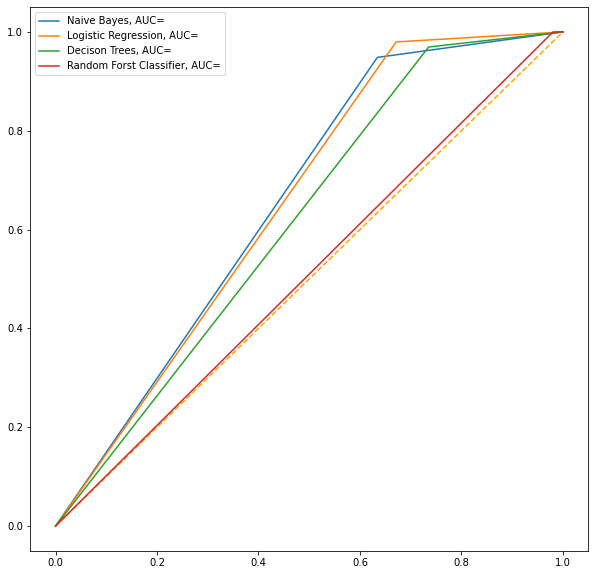

In [23]:
roc = plt.figure(figsize=(10,10))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

nb_fpr,nb_tpr,nb_thr=roc_curve(y_test,naive_bayes_predict)
nb_auc=roc_auc_score(y_test,naive_bayes_predict)
plt.plot(nb_fpr,nb_tpr,label="Naive Bayes, AUC=".format(nb_auc))

lr_fpr,lr_tpr,lr_thr=roc_curve(y_test,logisitc_regression_predict)
lr_auc=roc_auc_score(y_test,logisitc_regression_predict)
plt.plot(lr_fpr,lr_tpr,label="Logistic Regression, AUC=".format(lr_auc))

dt_fpr,dt_tpr,dt_thr=roc_curve(y_test,descision_tree_predict)
dt_auc=roc_auc_score(y_test,descision_tree_predict)
plt.plot(dt_fpr,dt_tpr,label="Decison Trees, AUC=".format(dt_auc))

rf_fpr,rf_tpr,rf_thr=roc_curve(y_test,random_forest_predict)
rf_auc=roc_auc_score(y_test,random_forest_predict)
plt.plot(rf_fpr,rf_tpr,label="Random Forst Classifier, AUC=".format(rf_auc))

plt.legend(loc=0)
plt.show()

#### Accuracy Score Comparison

In [24]:
print("Naive Bayes Classifier Accuracy=",naive_bayes_accuracy)
print("Logisitic Regression Accuracy=",logisitc_regression_accuracy)
print("Decision Trees Accuracy=",descision_tree_accuracy)
print("Random Forest Classifier Accuracy=",random_forest_accuracy)

Naive Bayes Classifier Accuracy= 89.08
Logisitic Regression Accuracy= 91.53
Decision Trees Accuracy= 89.97
Random Forest Classifier Accuracy= 90.29


From the above result we can conclude that logisitic regression would be the best classifier 

## Success Prediction

### Predicting Success and Probabilty

In [25]:
logistic_regression=LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_regression.fit(X_train,y_train)
logisitc_regression_predict=logistic_regression.predict(X_test)
logisitc_regression_predict_probabilty=logistic_regression.predict_proba(X_test)

In [60]:
X=restaurants.drop('target',axis=1)
y=restaurants['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)
test_data=X_test

In [61]:
probabilty_scores=logisitc_regression_predict_probabilty[:,1]

In [64]:
test_data=test_data.drop(columns=['success_class','success_probabilty'],axis=1)

In [65]:
test_data['success_class']=logisitc_regression_predict
test_data['success_probabilty']=probabilty_scores

In [66]:
test_data

,business_id,name,city,state,postal_code,avg_stars,review_count,review_stars,tokenized_words,success_class,success_probabilty
85204,KskYqH1Bi7Z_61pH6Om8pg,"""Lotus of Siam""",Las Vegas,NV,89104,4.0,3964,5,best thai food ever find experience food want ...,1,0.943188
104764,tJ9-u9MfpVbX4X2miIJ71w,"""Hokkaido Teppanyaki Steak House""",Las Vegas,NV,89135,4.0,145,5,favorite teppanyaki sushi restaurant la vega o...,1,0.990701
112071,b42EKdSk61zd_FEqEwioYQ,"""Upstream""",Charlotte,NC,28210,4.0,203,2,big fan maybe queen fest week menu experience ...,1,0.991875
52052,R_ZlcX46pPdjhjmfd043LA,"""Top of the World""",Las Vegas,NV,89104,4.0,1190,3,went top world friend ok steak cooked perfectl...,1,0.999892
23084,UNI1agsPX2k3eJSJVB91nw,"""Hot N Juicy Crawfish""",Las Vegas,NV,89102,4.0,1520,4,yowzer think kitchen made mistake served u def...,1,0.923644
...,...,...,...,...,...,...,...,...,...,...,...
6722,BjH8Xepc10i6OhCDQdX6og,"""Emeril's New Orleans Fish House""",Las Vegas,NV,89109,3.5,943,4,bf always come place dinner least trip vega de...,1,0.999985
23035,UNI1agsPX2k3eJSJVB91nw,"""Hot N Juicy Crawfish""",Las Vegas,NV,89102,4.0,1520,5,lunch hot n juicy left vega delicious recommen...,1,0.976357
67353,RKVYQ00LvK0_FO6Ll7lvOg,"""Muddy Waters Oyster Bar""",Pittsburgh,PA,15206,4.5,278,5,love coming sunday brunch great food friendly ...,1,0.971981
27121,lYFnZv0MSaGzo3J0azs7gg,"""Clean Catch Fish Market""",Charlotte,NC,28209,4.0,73,5,finished two best lobster roll ive ever eaten ...,1,0.999428


In [67]:
restaurant_predictions=test_data.groupby(['business_id']).first()

In [68]:
restaurant_predictions

,name,city,state,postal_code,avg_stars,review_count,review_stars,tokenized_words,success_class,success_probabilty
business_id,,,,,,,,,,
-1m9o3vGRA8IBPNvNqKLmA,"""Bavette's Steakhouse & Bar""",Las Vegas,NV,89109,4.5,38,5,absolutely amazing went celebrating family ann...,1,0.999897
-3zffZUHoY8bQjGfPSoBKQ,"""Michael Mina""",Las Vegas,NV,89109,4.0,590,3,let write okay bitch dared give joel robuchon ...,1,0.999886
-8ZiMXZReeTD3kwEvS0Lww,"""The Butcher Block""",Las Vegas,NV,89149,4.5,114,4,clean excellent customer service bought free r...,1,0.859743
-Eu04UHRqmGGyvYRDY8-tg,"""West Side Market""",Cleveland,OH,44113,4.5,758,5,zcuzhraj meat mouthful best smokies jerky ive ...,1,0.999827
-INdswGdyRyy72xXHalNbg,"""99 Ranch Market""",Las Vegas,NV,89102,3.0,144,3,supermarket located chinatown quite close chin...,1,0.748667
...,...,...,...,...,...,...,...,...,...,...
z52UIMVsYhfttfOP2H9VYg,"""Merchant Oyster Company""",Pittsburgh,PA,15201,3.5,24,2,expected lot went weekday early evening beat w...,1,0.990197
z6aHIaEM8WWxncbn5nYtXA,"""Popeyes Louisiana Kitchen""",Scarborough,ON,M1B 5V1,1.5,3,2,particularly impressed quality service locatio...,1,0.760282
z8H4Mdzl4jS9pYswj6Jf9w,"""Buca Yorkville""",Toronto,ON,M5R 0A1,3.5,125,1,unfortunately unhappy service frequently go ma...,1,0.917955


In [69]:
restaurant_predictions.success_class.value_counts()

1    717
0     57
Name: success_class, dtype: int64

In [70]:
restaurant_predictions.to_csv("processed_datasets/output.csv")